### TODO Recording

Please record this in the terminal window and NOT in the notebook

Be in the home directory of your machine ~/


`python --version`

`jupyter --version`

`mkdir full_stack_deep_learning`

`cd full_stack_deep_learning`

`python3 -m venv fsdl_venv`

`ls -l`

`source fsdl_venv/bin/activate`

IPython kernel (ipykernel) is a Python package that provides the communication between the Jupyter Notebook or JupyterLab interface and the Python kernel. It enables you to run Python code interactively and display the output within the notebook environment.

`pip install ipykernel`

Make sure you remove any other kernels that are present

`jupyter kernelspec list`

Install and make the mlflow_venv kernel available to Jupyter Notebooks

`python -m ipykernel install --user --name=fsdl_venv`

`jupyter kernelspec list`

Upgrade pip

`pip install --upgrade pip`

`pip install torch matplotlib numpy  pandas mlflow`

`mlflow --version`

`mlflow ui`

Go to http://127.0.0.1:5000 and show it is the same UI

Come back to the terminal and kill the server

`jupyter notebook`

Select the fsdl_venv for the notebook

#### NOTES: (not to be recorded)

Windows

`fsdl_venv/bin/activate`

Uninstall kernel

`jupyter kernelspec uninstall <env_name>`

### TODO Recording

- Go the MLflow server running on ngrok
- Download all the artifacts (they will get downloaded to your Downloads/ folder)
- Behind the scenes arrange them in the right directory structure inside 

`full_stack_deep_learning/mlruns/best_model`

- IMPORTANT: Open up the structure of best_model in a Finder window and show

- Inside best_model

`
best_model/

    conda.yaml
  
    data/
       
       model.pth
       
       pickle_module_info.txt
    
    MLmodel
    
    python_env.yaml
    
    requirements.txt
`

- Come back to the notebook and execute the code by pasting in

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

We are loading only the test data for local serving

In [2]:
emnist_test_data = pd.read_csv("emnist-letters-test.csv")

emnist_test_data = emnist_test_data.sample(frac = 1)

In [3]:
class EMNISTDataset(Dataset):
    def __init__(self, dataframe):
        
        self.images = torch.tensor(dataframe.iloc[:, 1:].values, dtype= torch.float32)
        
        self.labels = torch.tensor(dataframe.iloc[:, 0].values, dtype = torch.float32)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        images = self.images[idx]
        
        images = images / 255.0
        
        labels = self.labels[idx]
        
        return images, labels

In [4]:
test_dataset = EMNISTDataset(emnist_test_data )

test_dataloader = DataLoader(test_dataset, batch_size = 64)

In [5]:
test_dataiter = iter(test_dataloader)

test_imgs, test_labels = next(test_dataiter)

test_imgs.shape, test_labels.shape

(torch.Size([64, 784]), torch.Size([64]))

Verifying the downloaded model for predictions

In [6]:
import mlflow

logged_model = 'mlruns/best_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

predictions = loaded_model.predict(test_imgs.numpy().reshape(-1, 1, 28, 28))

predictions.shape

2023/12/09 09:45:07 WARNING mlflow.pyfunc: Encountered an unexpected error (AttributeError("module 'pathlib' has no attribute '__version__'")) while detecting model dependency mismatches. Set logging level to DEBUG to see the full traceback.


(64, 26)

### Plotting the input image

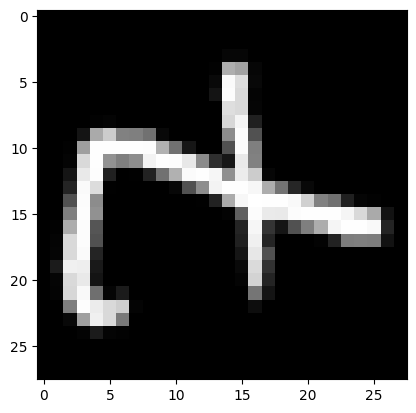

In [7]:
plt.imshow(test_imgs[5].numpy().reshape(28, 28), cmap = 'gray')

In [8]:
test_labels[5]

tensor(6.)

In [9]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
           'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

Actual label is checked

In [10]:
classes[int(test_labels[5].item())-1]

'f'

Input is made into json format

In [11]:
import json

# Get the tensor in the shape [-1, 1, 28, 28] and create a list of these tensors
#
data = json.dumps({"instances": test_imgs[5].reshape(-1, 1, 28, 28).tolist()})

data

'{"instances": [[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0235294122248888, 0.0235294122248888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007843137718737125, 0.6823529601097107, 0.6352941393852234, 0.0235294122248888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411926865578, 0.9803921580314636, 0.8666666746139526, 0.0313725508749485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### TODO Recording:

- Run the below command in terminal with Full_stack_deep_learning as working directory

`mlflow models serve -m mlruns/best_model --env-manager local --host 127.0.0.1:1234`

### TODO Recording

- Copy over the JSON string from above and running the below cell to show predictions

In [12]:
!curl http://127.0.0.1:1234/invocations -H 'Content-Type: application/json' -d \
        '{"instances": [[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0235294122248888, 0.0235294122248888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007843137718737125, 0.6823529601097107, 0.6352941393852234, 0.0235294122248888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411926865578, 0.9803921580314636, 0.8666666746139526, 0.0313725508749485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0784313753247261, 0.9882352948188782, 0.8509804010391235, 0.01568627543747425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8705882430076599, 0.8509804010391235, 0.019607843831181526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.007843137718737125, 0.01568627543747425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.843137264251709, 0.9607843160629272, 0.125490203499794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0784313753247261, 0.6666666865348816, 0.800000011920929, 0.5058823823928833, 0.49803921580314636, 0.4431372582912445, 0.0313725508749485, 0.0, 0.0, 0.0, 0.0, 0.5490196347236633, 0.9882352948188782, 0.32156863808631897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.007843137718737125, 0.6235294342041016, 0.9960784316062927, 0.9960784316062927, 0.9960784316062927, 0.9960784316062927, 0.9921568632125854, 0.6941176652908325, 0.4470588266849518, 0.08627451211214066, 0.0, 0.0, 0.32156863808631897, 0.9882352948188782, 0.49803921580314636, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.01568627543747425, 0.8509804010391235, 0.9960784316062927, 0.572549045085907, 0.49803921580314636, 0.5529412031173706, 0.9529411792755127, 0.9960784316062927, 0.9921568632125854, 0.9098039269447327, 0.545098066329956, 0.18039216101169586, 0.08627451211214066, 0.9137254953384399, 0.5058823823928833, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.08235294371843338, 0.9137254953384399, 0.9921568632125854, 0.125490203499794, 0.0, 0.003921568859368563, 0.13333334028720856, 0.4470588266849518, 0.6941176652908325, 0.9843137264251709, 0.9960784316062927, 0.9647058844566345, 0.5607843399047852, 0.9254902005195618, 0.800000011920929, 0.0235294122248888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.14509804546833038, 0.9803921580314636, 0.8627451062202454, 0.003921568859368563, 0.0, 0.0, 0.0, 0.0, 0.027450980618596077, 0.32156863808631897, 0.5529412031173706, 0.9529411792755127, 0.9960784316062927, 0.9960784316062927, 0.9686274528503418, 0.6784313917160034, 0.45098039507865906, 0.14901961386203766, 0.0313725508749485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.32156863808631897, 0.9882352948188782, 0.5490196347236633, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003921568859368563, 0.13333334028720856, 0.6705882549285889, 0.9686274528503418, 1.0, 0.9960784316062927, 0.9960784316062927, 0.9764705896377563, 0.8156862854957581, 0.5058823823928833, 0.4470588266849518, 0.125490203499794, 0.019607843831181526, 0.007843137718737125, 0.0, 0.0], [0.0, 0.0, 0.49803921580314636, 0.9921568632125854, 0.5686274766921997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0117647061124444, 0.3764705955982208, 0.9882352948188782, 0.9176470637321472, 0.9137254953384399, 0.9882352948188782, 0.9960784316062927, 0.9960784316062927, 0.9960784316062927, 0.9607843160629272, 0.8509804010391235, 0.6666666865348816, 0.07058823853731155, 0.0], [0.0, 0.007843137718737125, 0.6745098233222961, 0.9882352948188782, 0.3333333432674408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14509804546833038, 0.9647058844566345, 0.2078431397676468, 0.08235294371843338, 0.32156863808631897, 0.49803921580314636, 0.6784313917160034, 0.9607843160629272, 0.9960784316062927, 0.9960784316062927, 0.9764705896377563, 0.14509804546833038, 0.0], [0.0, 0.01568627543747425, 0.8509804010391235, 0.9882352948188782, 0.32156863808631897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125490203499794, 0.9411764740943909, 0.14509804546833038, 0.0, 0.0, 0.0, 0.0117647061124444, 0.13333334028720856, 0.4901960790157318, 0.49803921580314636, 0.4901960790157318, 0.07058823853731155, 0.0], [0.0, 0.019607843831181526, 0.8509804010391235, 0.9803921580314636, 0.14509804546833038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08235294371843338, 0.9058823585510254, 0.3137255012989044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.10588235408067703, 0.9411764740943909, 0.9333333373069763, 0.09803921729326248, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411926865578, 0.8549019694328308, 0.19607843458652496, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.019607843831181526, 0.8509804010391235, 0.9137254953384399, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01568627543747425, 0.8313725590705872, 0.14509804546833038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.01568627543747425, 0.843137264251709, 0.9764705896377563, 0.43529412150382996, 0.019607843831181526, 0.10588235408067703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4588235318660736, 0.0784313753247261, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.4941176474094391, 0.9921568632125854, 0.9254902005195618, 0.8509804010391235, 0.8078431487083435, 0.01568627543747425, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05098039284348488, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0313725508749485, 0.6235294342041016, 0.9411764740943909, 0.8509804010391235, 0.4745098054409027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0117647061124444, 0.10588235408067703, 0.01568627543747425, 0.007843137718737125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]]]}'

{"predictions": [[2.219493865966797, -29.166210174560547, -2.2996528148651123, -19.977157592773438, -1.8264541625976562, 25.076261520385742, -1.4856475591659546, -4.888859748840332, -2.687130928039551, 2.9445738792419434, -12.61015510559082, -11.612971305847168, -40.70948028564453, -14.043591499328613, -28.91634178161621, -7.952877998352051, -2.760037899017334, 2.014089822769165, -8.494477272033691, 7.568127632141113, -25.137611389160156, -21.357650756835938, -15.9081449508667, -3.7703542709350586, -8.111644744873047, -5.135300159454346]]}

### TODO Recording

- Copy over the JSON for the predictions above

In [15]:
predictions = json.loads(
    '{"predictions": [[2.219493865966797, -29.166210174560547, -2.2996528148651123, -19.977157592773438, -1.8264541625976562, 25.076261520385742, -1.4856475591659546, -4.888859748840332, -2.687130928039551, 2.9445738792419434, -12.61015510559082, -11.612971305847168, -40.70948028564453, -14.043591499328613, -28.91634178161621, -7.952877998352051, -2.760037899017334, 2.014089822769165, -8.494477272033691, 7.568127632141113, -25.137611389160156, -21.357650756835938, -15.9081449508667, -3.7703542709350586, -8.111644744873047, -5.135300159454346]]}'
)['predictions'][0]

predictions

[2.219493865966797,
 -29.166210174560547,
 -2.2996528148651123,
 -19.977157592773438,
 -1.8264541625976562,
 25.076261520385742,
 -1.4856475591659546,
 -4.888859748840332,
 -2.687130928039551,
 2.9445738792419434,
 -12.61015510559082,
 -11.612971305847168,
 -40.70948028564453,
 -14.043591499328613,
 -28.91634178161621,
 -7.952877998352051,
 -2.760037899017334,
 2.014089822769165,
 -8.494477272033691,
 7.568127632141113,
 -25.137611389160156,
 -21.357650756835938,
 -15.9081449508667,
 -3.7703542709350586,
 -8.111644744873047,
 -5.135300159454346]

So the predicted label=actual label

In [16]:
classes[np.argmax(predictions)]

'f'

### TODO Recording:

- Scroll back up to where you display the image and select a different image
- Follow the same steps to get the predictions on the different image
- Total we should show predictions on 2 images